In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
#as date of jouney deptime arrival time should be in date time format we have to converet

In [9]:
df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [10]:
def converter(df,date_column):
    df[date_column] = pd.to_datetime(df[date_column])

In [11]:
x=['Date_of_Journey','Dep_Time','Arrival_Time']
for i in x:
    converter(df,i)

C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\165850772.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_column] = pd.to_datetime(df[date_column])
C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\165850772.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_column] = pd.to_datetime(df[date_column])
C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\165850772.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_column] = pd.to_datetime(df[date_column])


In [12]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
df1=df

In [14]:
df['Journey_day']=df['Date_of_Journey'].dt.day

In [15]:
df['Journey_month']=df['Date_of_Journey'].dt.month

In [16]:
df['Journey_year']=df['Date_of_Journey'].dt.year

In [17]:
#df.head()
df=df.drop('Date_of_Journey',axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2025-04-11 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-11 05:50:00,2025-04-11 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-11 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2025-04-11 18:05:00,2025-04-11 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2025-04-11 16:50:00,2025-04-11 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [18]:
df['Dep_Time'][0]

Timestamp('2025-04-11 22:20:00')

In [19]:
def extract(df,obj):
    df[obj+'hours']=df[obj].dt.hour
    df[obj+'minutes']=df[obj].dt.minute
    df.drop(obj,axis=1,inplace=True)

In [20]:
extract(df,'Dep_Time')

In [21]:
extract(df,'Arrival_Time')

In [22]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Timehours,Dep_Timeminutes,Arrival_Timehours,Arrival_Timeminutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


In [23]:
df['Duration'][1]

'7h 25m'

In [24]:
'7h 25m'.split()

['7h', '25m']

In [25]:
'25m'[0:-1]

'25'

In [26]:
def convert(i):
        ans=[]
        list=i.split()
        hours=0
        minute=0
        for j in list:
            if 'h' in j:
                hours=int(j[0:-1])
            if 'm' in j:
                minute=int(j[0:-1])
        ans.append(hours)
        ans.append(minute)
        return ans

In [27]:
convert(df['Duration'][2])

[19, 0]

In [28]:
df['Duration_hours']=df['Duration'].apply(lambda x:convert(x)[0])
df['Duration_minute']=df['Duration'].apply(lambda x:convert(x)[1])
df=df.drop('Duration',axis=1)

In [29]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Timehours,Dep_Timeminutes,Arrival_Timehours,Arrival_Timeminutes,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50


In [30]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int32
Journey_month           int32
Journey_year            int32
Dep_Timehours           int32
Dep_Timeminutes         int32
Arrival_Timehours       int32
Arrival_Timeminutes     int32
Duration_hours          int64
Duration_minute         int64
dtype: object

In [31]:
#as machine learning model works on numerical value so we have to convert some column to numerical
#this is done by feature engineering

In [32]:
col=df.columns

In [33]:
col

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Timehours', 'Dep_Timeminutes', 'Arrival_Timehours',
       'Arrival_Timeminutes', 'Duration_hours', 'Duration_minute'],
      dtype='object')

In [34]:
cat_col=[x for x in col if df[x].dtype=='object']

In [35]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [36]:
num_col=[x for x in col if df[x].dtype!='object']

In [37]:
categorical=df[cat_col]

In [38]:
categorical.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info


In [39]:
categorical['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

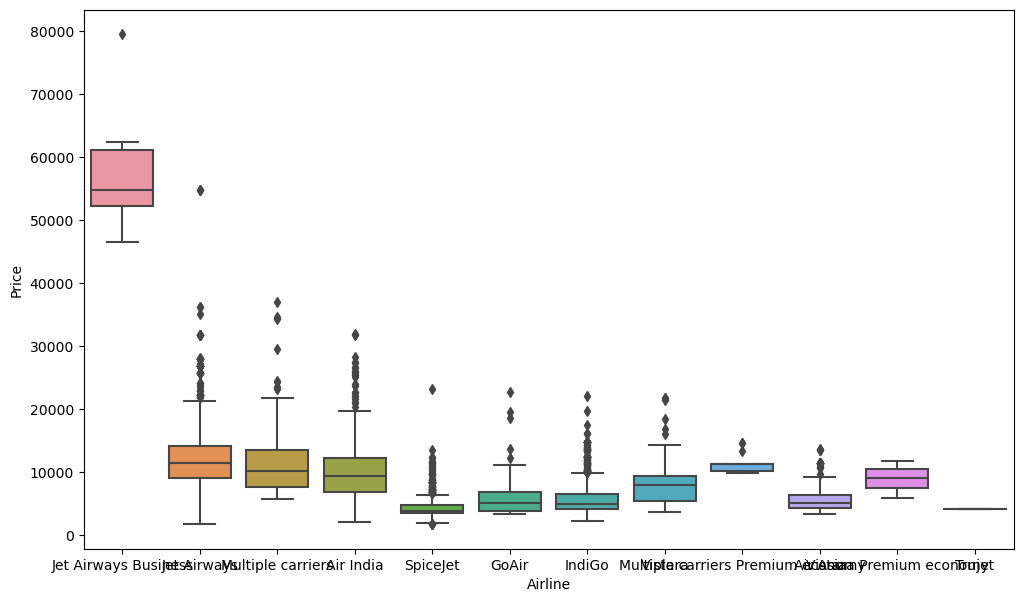

In [40]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Total_Stops', ylabel='Price'>

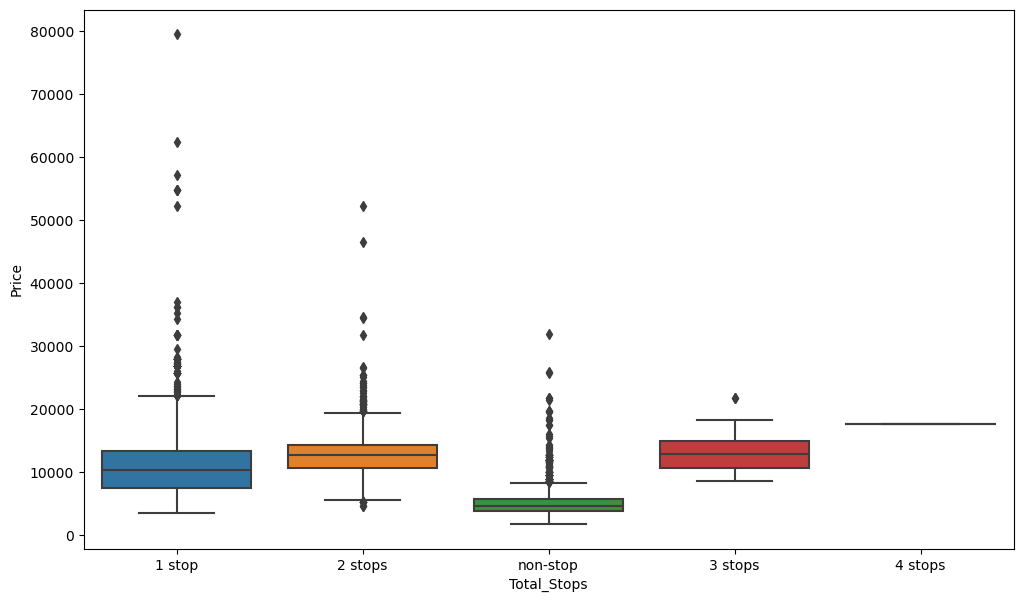

In [41]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [42]:
#we have to convert cat_col into numerical value

In [43]:
airline_dummy=pd.get_dummies(categorical['Airline'],drop_first=True)

In [44]:
airline_dummy.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False


In [45]:
categorical['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

<Axes: xlabel='Source', ylabel='Price'>

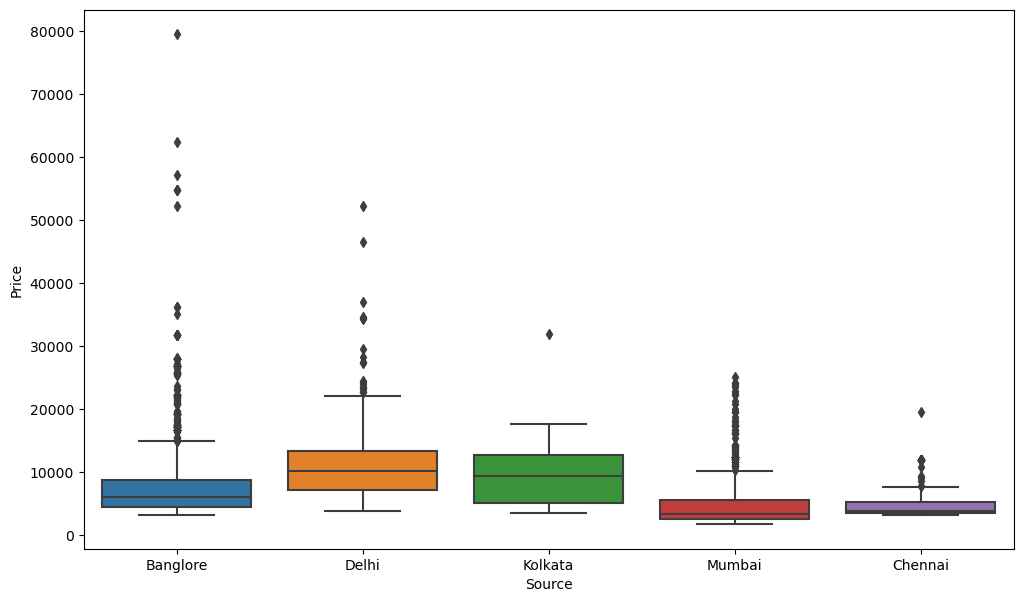

In [46]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

In [47]:
source_dummy=pd.get_dummies(categorical['Source'],drop_first=True)

In [48]:
source_dummy.head(5)

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [49]:
destination_dummy=pd.get_dummies(categorical['Destination'],drop_first=True)

In [50]:
destination_dummy.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [51]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\4124669443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route1']=categorical['Route'].str.split('→').str[0]
C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\4124669443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route2']=categorical['Route'].str.split('→').str[1]
C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\4124669443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [52]:
categorical.drop('Route',axis=1,inplace=True)
categorical.head()

C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\2093556423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop('Route',axis=1,inplace=True)


,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


<Axes: >

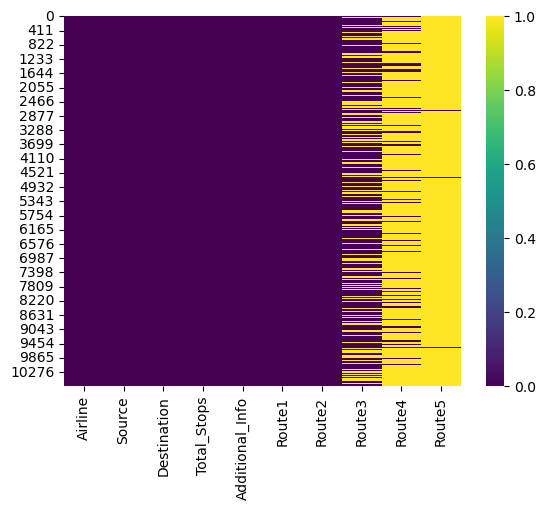

In [53]:
sns.heatmap(categorical.isnull(),cmap='viridis')

In [54]:
#as some value in route 2 route 4 route 5 are nan solve that

In [55]:
for i in ['Route3','Route4','Route5']:
    categorical[i].fillna('None',inplace=True)

C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\1293557805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i].fillna('None',inplace=True)


<Axes: >

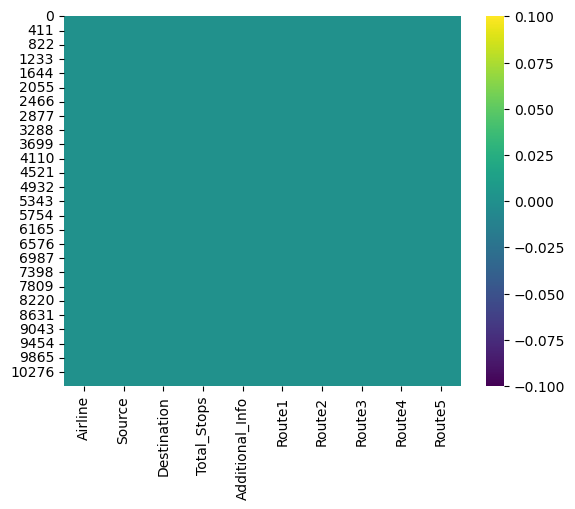

In [56]:
sns.heatmap(categorical.isnull(),cmap='viridis')

In [57]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


In [58]:
#as route2has 45 different categories so it will hard for manual enconding each manually so will use here label encoder

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
encoder=LabelEncoder()

In [61]:
for i in ['Route1','Route2','Route3','Route4','Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\1864785191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])
C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\1864785191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])
C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\1864785191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [62]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [63]:
categorical['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [64]:
#so we can drop additonal info here as 80% are no info

In [65]:
categorical.drop('Additional_Info',axis=1,inplace=True)

C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\42470160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop('Additional_Info',axis=1,inplace=True)


In [66]:
categorical['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [67]:
dict={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [68]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\130354464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [69]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [70]:
df=pd.concat([categorical,airline_dummy,source_dummy,destination_dummy,df[num_col]],axis=1)

In [71]:
df.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,...,Price,Journey_day,Journey_month,Journey_year,Dep_Timehours,Dep_Timeminutes,Arrival_Timehours,Arrival_Timeminutes,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,False,...,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,True,...,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,False,...,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,False,...,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,False,...,13302,1,3,2019,16,50,21,35,4,45


In [72]:
df.drop('Airline',axis=1,inplace=True)
df.drop('Source',axis=1,inplace=True)
df.drop('Destination',axis=1,inplace=True)

In [73]:
df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,Price,Journey_day,Journey_month,Journey_year,Dep_Timehours,Dep_Timeminutes,Arrival_Timehours,Arrival_Timeminutes,Duration_hours,Duration_minute
0,0,0,13,29,13,5,False,False,True,False,...,3897,24,3,2019,22,20,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,...,7662,1,5,2019,5,50,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,...,13882,9,6,2019,9,25,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,...,6218,12,5,2019,18,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,...,13302,1,3,2019,16,50,21,35,4,45


In [74]:
#performing outliers detection in data

In [75]:
def plot(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)

C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\1914490626.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax1)


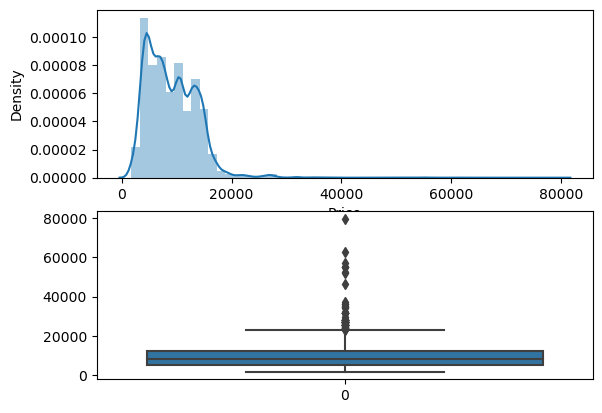

In [76]:
plot(df,'Price')

In [77]:
df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])

C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\1914490626.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax1)


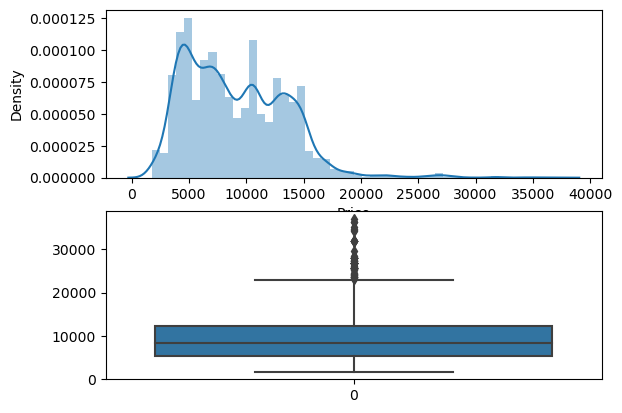

In [78]:
plot(df,'Price')

In [79]:
#Now Prediction model
X=df.drop('Price',axis=1)
X.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Journey_day,Journey_month,Journey_year,Dep_Timehours,Dep_Timeminutes,Arrival_Timehours,Arrival_Timeminutes,Duration_hours,Duration_minute
0,0,0,13,29,13,5,False,False,True,False,...,True,24,3,2019,22,20,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,...,False,1,5,2019,5,50,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,...,False,9,6,2019,9,25,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,...,False,12,5,2019,18,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,...,True,1,3,2019,16,50,21,35,4,45


In [80]:
X.columns

Index(['Total_Stops', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_Timehours', 'Dep_Timeminutes', 'Arrival_Timehours',
       'Arrival_Timeminutes', 'Duration_hours', 'Duration_minute'],
      dtype='object')

In [81]:
y=df['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [82]:
#feature selection so that the column which has greater effect on price will be more preferrable
#so multiple column problem solved

In [83]:
#from sklearn.feature_selection import mutual_info_classif

In [84]:
#mutual_info_classif(X,y)

In [85]:
#imp=pd.DataFrame(mutual_info_classif(X,y))

In [86]:
#imp.head()

In [87]:
#imp.columns=['importance']

In [88]:
#imp.sort_values(by='importance',ascending=False)

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
def pred(algo):
    model=algo.fit(X_train,y_train)
    predictions=model.predict(X_test)
    print(classification_report(y_test,predictions))
    print('\n')
    print(confusion_matrix(y_test,predictions))

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf=RandomForestClassifier(n_estimators=100)

In [95]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [96]:
predictions=rf.predict(X_test)

In [97]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      1965.0       0.20      0.43      0.27         7
      2017.0       0.33      0.14      0.20        14
      2050.0       0.50      1.00      0.67         1
      2071.0       0.00      0.00      0.00         1
      2175.0       0.00      0.00      0.00         1
      2227.0       1.00      0.75      0.86        12
      2228.0       0.00      0.00      0.00         3
      2385.0       0.25      1.00      0.40         1
      2437.0       0.00      0.00      0.00         1
      2575.0       1.00      1.00      1.00         1
      2647.0       0.00      0.00      0.00         2
      2753.0       0.00      0.00      0.00         0
      2754.0       0.64      0.78      0.70         9
      2759.0       0.00      0.00      0.00         3
      3100.0       0.94      0.94      0.94        16
      3173.0       0.00      0.00      0.00         1
      3175.0       1.00      0.60      0.75         5
      3205.0       0.00    

C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_cla

(array([4.000e+00, 6.000e+00, 1.610e+02, 1.548e+03, 3.510e+02, 5.600e+01,
        7.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([-16170. , -11892.7,  -7615.4,  -3338.1,    939.2,   5216.5,
          9493.8,  13771.1,  18048.4,  22325.7,  26603. ]),
 <BarContainer object of 10 artists>)

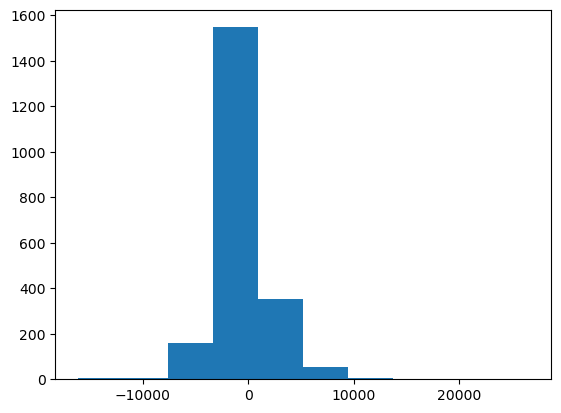

In [98]:
plt.hist(y_test-predictions)

In [153]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

Training_score: 0.9518223265089745
Predictions are : [16875.28        5352.21        8828.31       ...  6810.98
 12914.01083333 13248.55233333]


r2_score: 0.8351778937015876
MSE :  3375519.0155161326
MAE :  1134.2166344464042
RMSE :  1837.2585597885052


C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\2767426301.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_prediction)


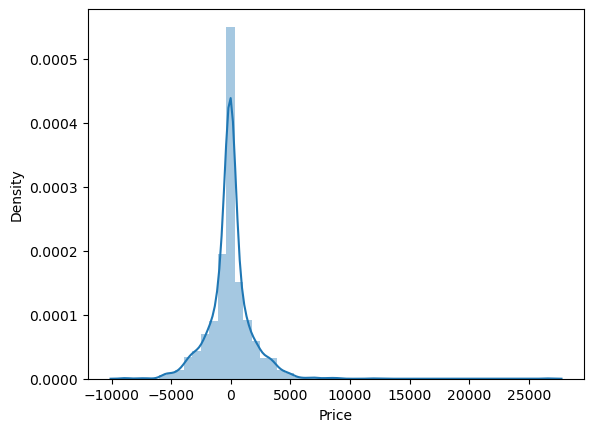

In [154]:
predict(RandomForestRegressor())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [226]:
#predict(DecisionTreeRegressor())

In [227]:
predict(LinearRegression())

NameError: name 'LinearRegression' is not defined

In [ ]:
predict(KNeighborsRegressor())

In [ ]:
#hence randomforest regressor giving r2 score of 83% accuracy 83 %

In [ ]:
#randomsearchcv hypertuning model gridsearchcv like use

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
reg_rf=RandomForestRegressor()

In [120]:
from sklearn.model_selection import RandomizedSearchCV

In [121]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [122]:
# Create the grid or hyper-parameter space
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split 
}

In [123]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [124]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\rohit\anaconda3\Lib\site-packages\s

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [125]:
rf_Random.best_params_

{'n_estimators': 1040,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 21}

In [126]:
from sklearn import metrics

In [127]:
predictions2=rf_Random.predict(X_test)

In [128]:
metrics.r2_score(y_test,predictions2)

0.8224009814391808

C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\3209803836.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions2)


<Axes: xlabel='Price', ylabel='Density'>

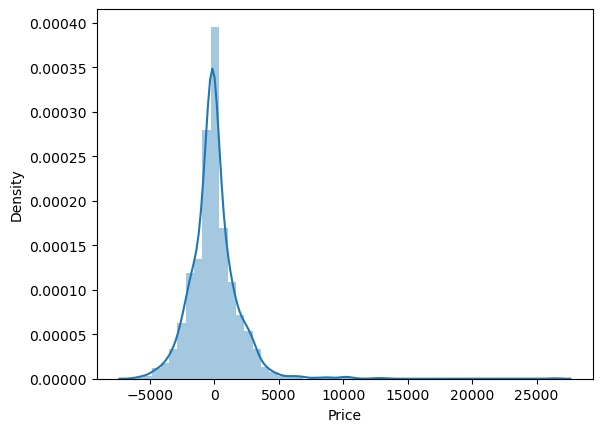

In [129]:
#hence it giving 82% predictions
sns.distplot(y_test-predictions2)

In [130]:
import pickle

In [213]:
pickle.dump(rf_Random,open('rf_random1.pkl','wb'))

In [214]:
import joblib

# Save with compression level 3 (0-9)
joblib.dump(rf_Random, 'rf_random.pkl', compress=7)


['rf_random.pkl']

In [215]:
import joblib
forest = joblib.load('rf_random.pkl')

In [217]:
y_predictions=forest.predict(X_test)

In [218]:
y_predictions

array([17232.81250316,  6079.95233888,  8629.88341923, ...,
        6728.16758491, 12092.04801799, 12484.71185119])

In [219]:
metrics.r2_score(y_test,y_predictions)

0.8224009814391808

In [220]:
df=pd.read_excel('Data_Train.xlsx')

In [221]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [222]:
x=['Date_of_Journey','Dep_Time','Arrival_Time']
for i in x:
    converter(df,i)

C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\165850772.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_column] = pd.to_datetime(df[date_column])
C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\165850772.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_column] = pd.to_datetime(df[date_column])
C:\Users\rohit\AppData\Local\Temp\ipykernel_13920\165850772.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_column] = pd.to_datetime(df[date_column])


In [223]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [224]:
pickle.dump(df,open('df.pkl','wb'))

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\rohit\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.
